# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию, а качество будем измерять по метрике RMSE.

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

In [1]:
import pandas as pd
import pathlib as pth
import sklearn as sk
import numpy as np
root = pth.Path().resolve()
data_path = root / "data.csv"
score_path =  root / "scores.csv"
attend_path = root / "attendance.csv"
supprot_path = root / "school_support.txt"
df = pd.read_csv(data_path)
sc = pd.read_csv(score_path, names = ["score"])


### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [2]:

doubled_column = df['plans_universitypast_failures'] 
del df['plans_universitypast_failures']
df['plans_university'] = doubled_column.astype(str).str[:-1].astype(int)
df['past_failures'] = doubled_column.astype(str).str[-1].astype(int)

### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [3]:

df.fillna(df.median(numeric_only=True), inplace=True)


### Задача 3: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

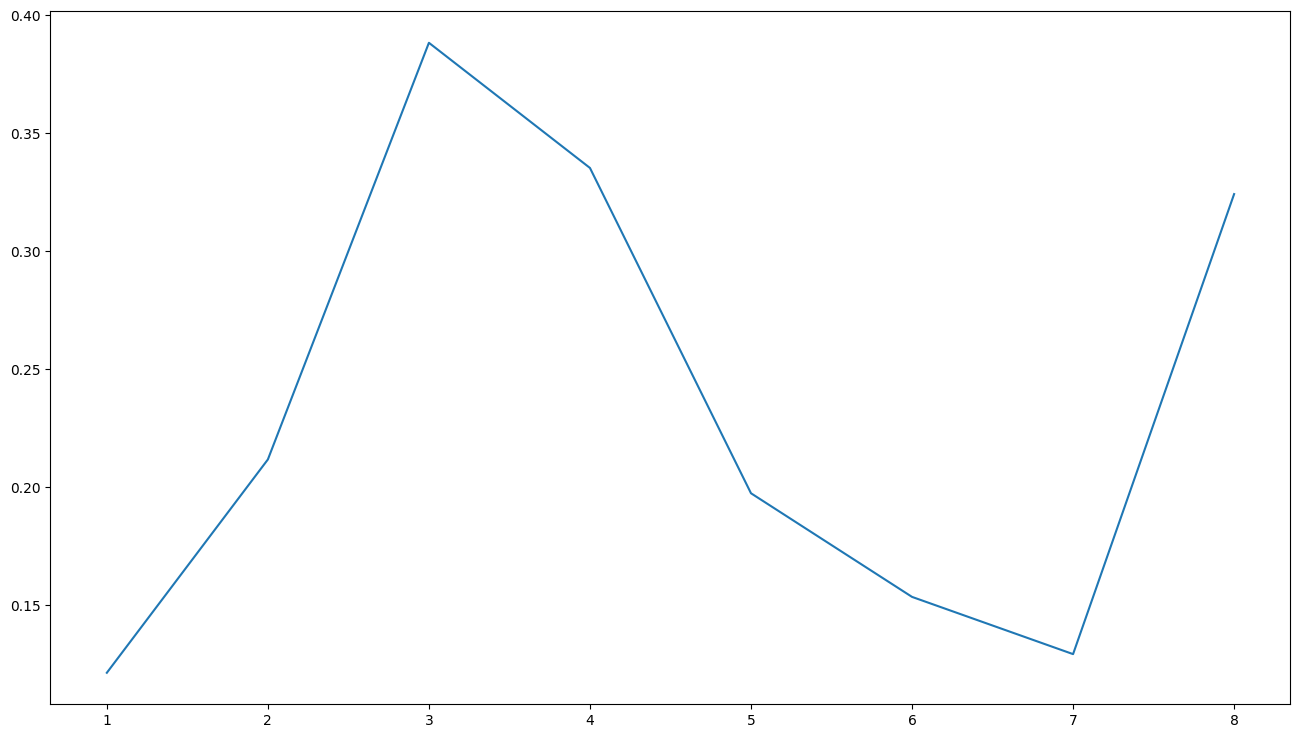

In [4]:
import sklearn.model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold


reg = sk.linear_model.LinearRegression()
kfold = KFold(n_splits=8, shuffle=True, random_state=239)
cv_scores = cross_val_score(reg, df, sc, cv=kfold)

plt.figure(figsize=(16, 9))
plt.plot(range(1, len(cv_scores)+1,), cv_scores)










### Задача 4: нормализация данных
__(1 балл)__

Нормализуйте данные и повторите предыдущий пункт

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

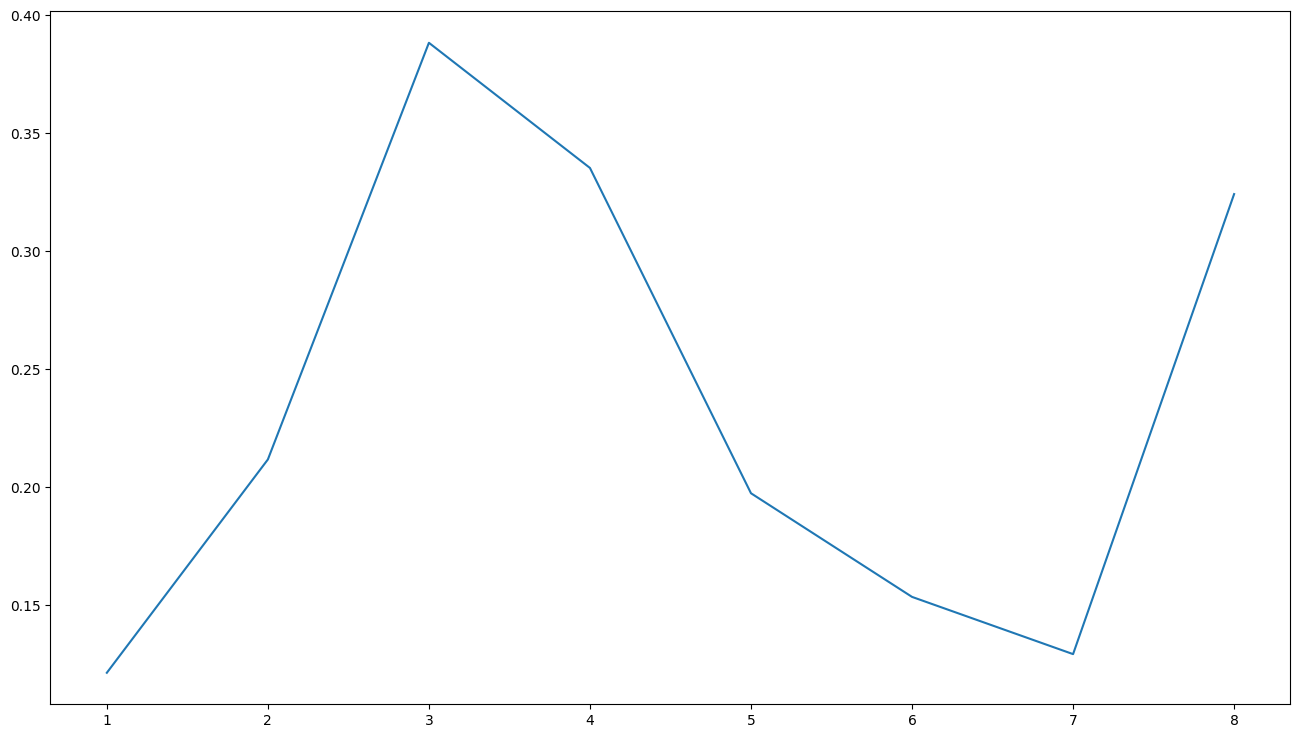

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

import sklearn.model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold


reg = sk.linear_model.LinearRegression()
kfold = KFold(n_splits=8, shuffle=True, random_state=239)
cv_scores = cross_val_score(reg, df_norm, sc, cv=kfold)

plt.figure(figsize=(16, 9))
plt.plot(range(1, len(cv_scores)+1,), cv_scores)


### Задача 5: полные данные
__(3 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь

### Задача 6: борьба с выбросами
__(3 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность.

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

0      1
1      1
2      2
3      2
4      2
      ..
643    2
644    4
645    2
647    1
648    1
Name: traveltime, Length: 646, dtype: int64

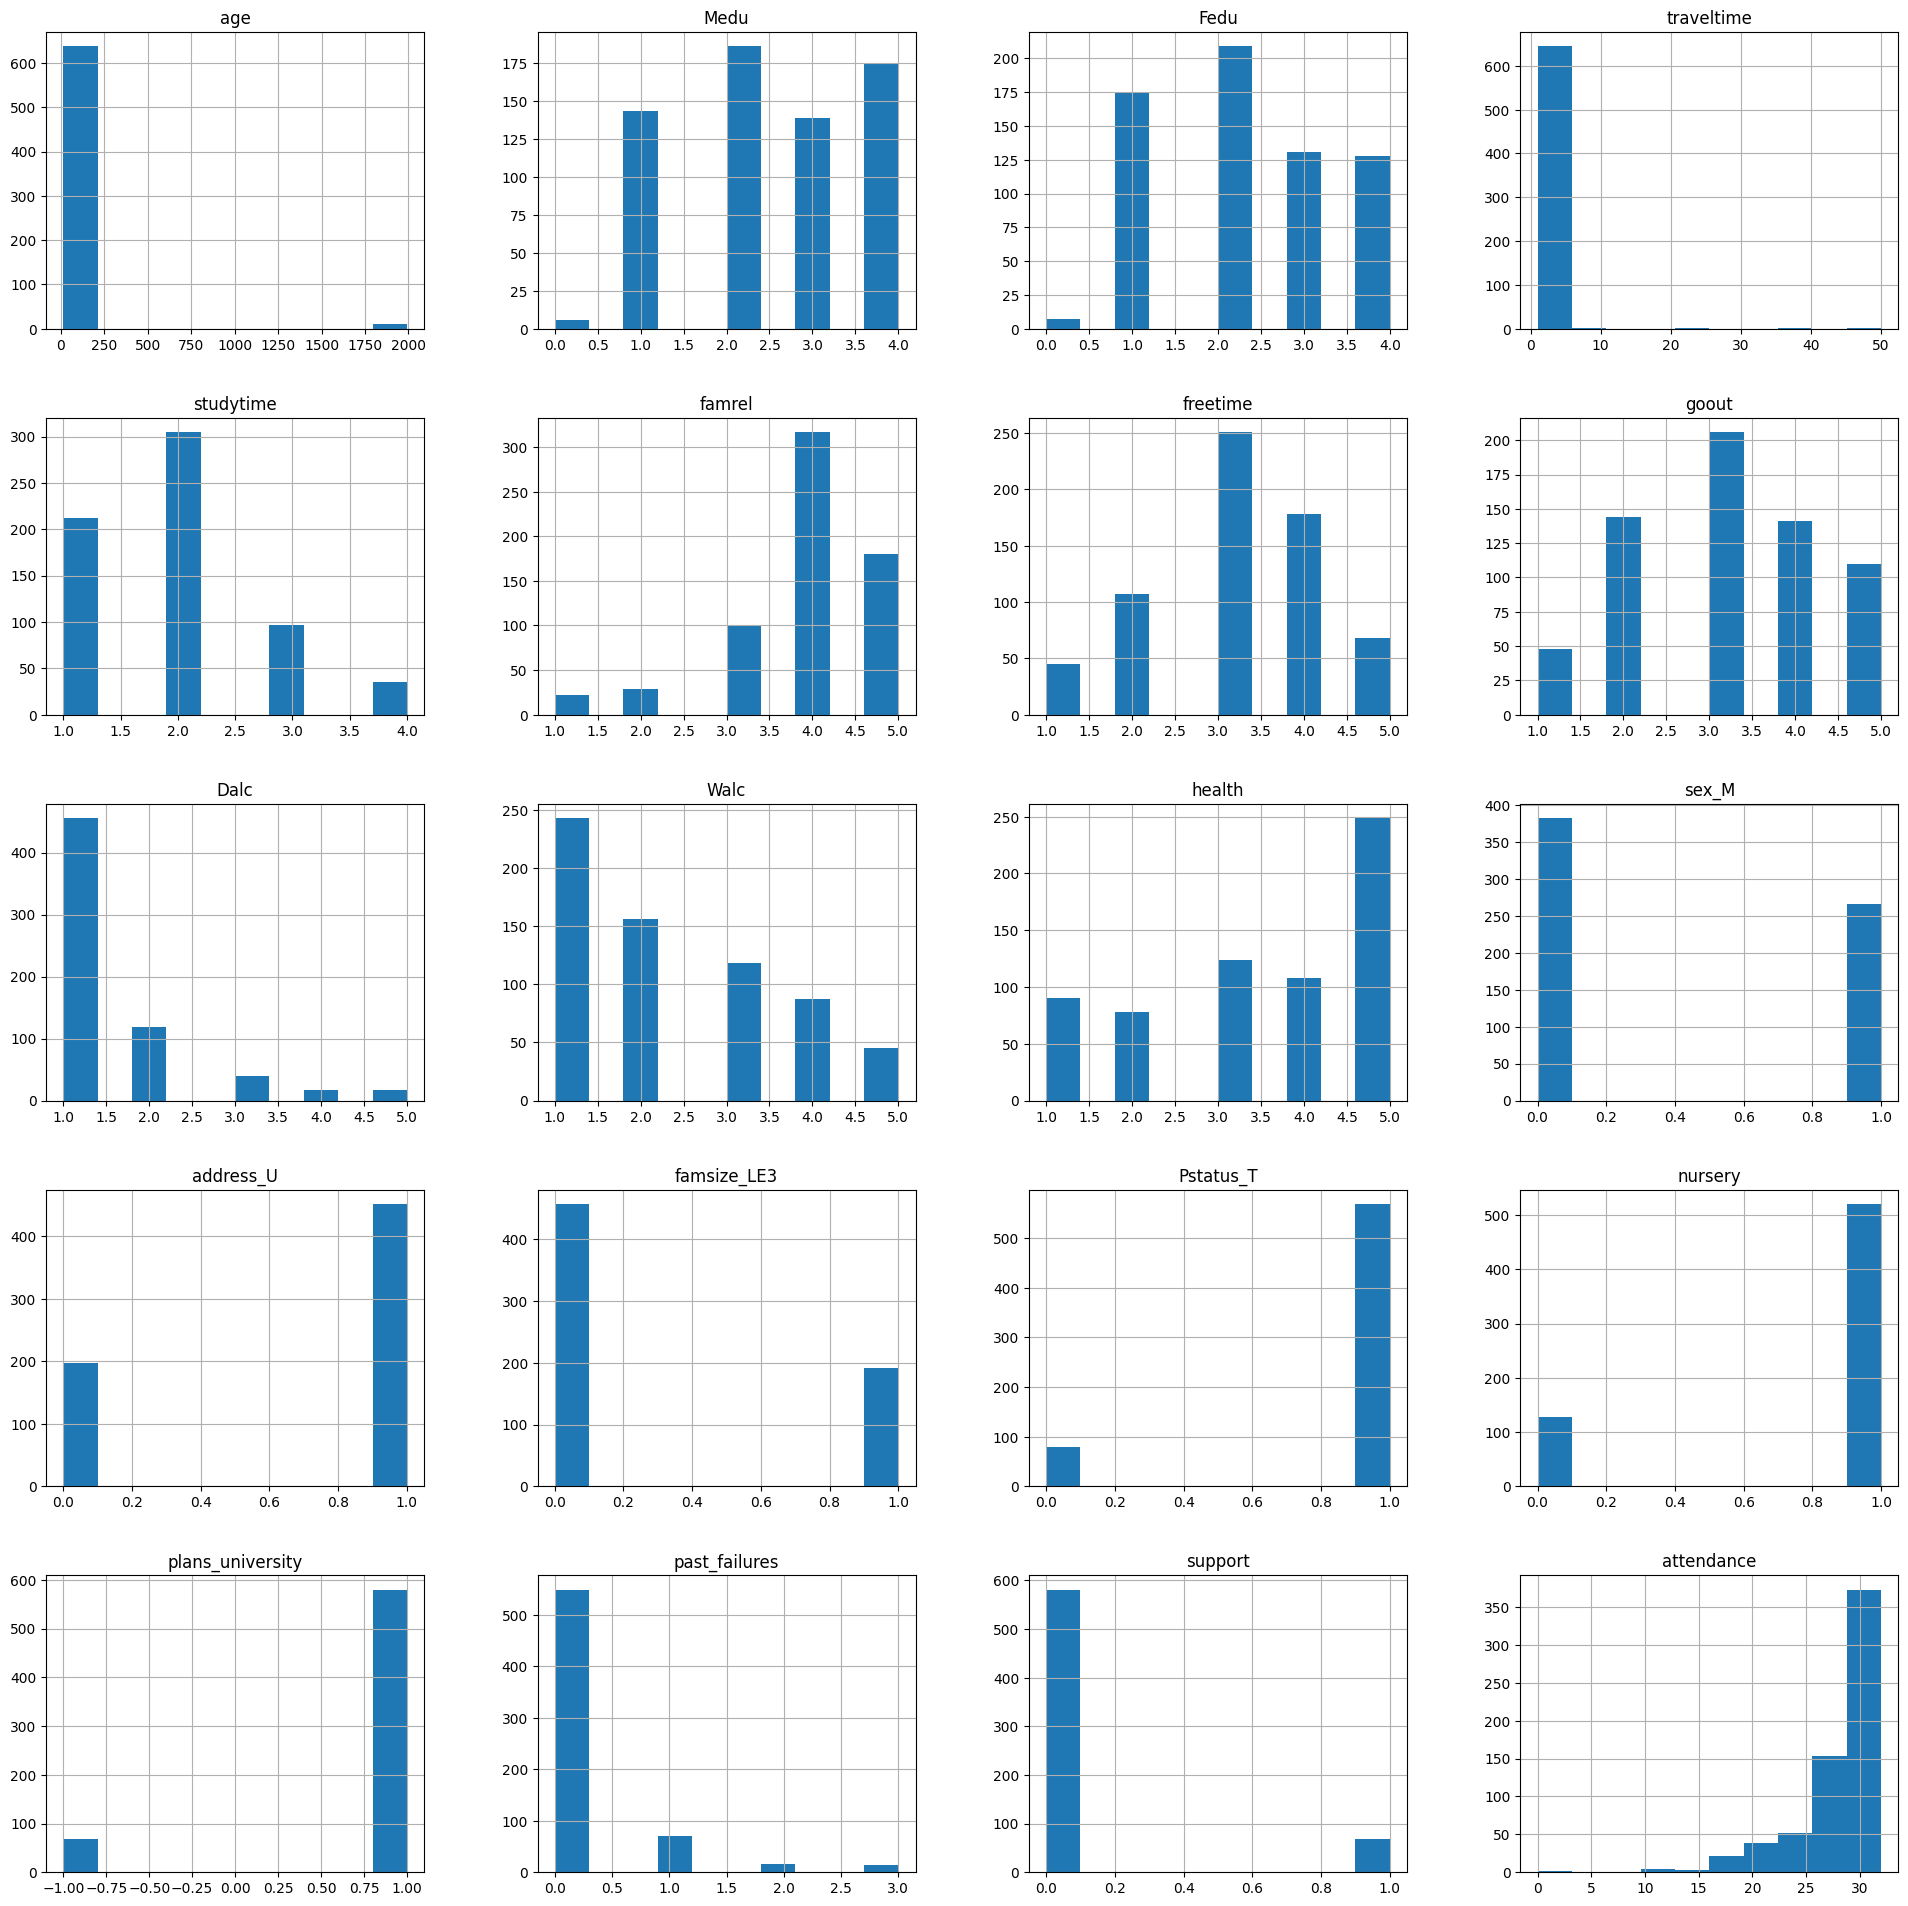

In [7]:
df.hist(figsize=(23.9, 23.9)) 
df['age'] = df['age'].apply(lambda x: 2006 - x if x > 100 else x) 
sc = sc[df['age'] < 21]
df = df[df['age'] < 21]
df["attendance"].apply(lambda x: at_size - x if x < at_size * 0.25 else x)
df['traveltime'].apply(lambda x: 1 if x > 5 else x) 


Другой простой способ найти выбросы &mdash; сделать предсказание на всех объектах и посмотреть на объекты с наибольшей ошибкой. Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

In [8]:
reg.fit(df, sc)
y_p =reg.predict(df)
dist = np.abs(sc - y_p)

top_dist = df.iloc[dist.nlargest(7, columns=['score']).index]
print(top_dist)

     age  Medu  Fedu  traveltime  studytime  famrel  freetime  goout  Dalc  \
354   18     4     2           1          2       5         3    1.0   1.0   
587   18     2     1           3          2       4         4    5.0   4.0   
319   17     4     2           1          2       5         5    5.0   1.0   
617   17     3     3           2          3       4         2    2.0   2.0   
386   17     1     2           1          2       3         1    3.0   1.0   
303   18     2     1           2          1       4         4    3.0   1.0   
405   18     4     3           1          1       5         4    4.0   1.0   

     Walc  health  sex_M  address_U  famsize_LE3  Pstatus_T  nursery  \
354   1.0       5      0          0            1          0        1   
587   4.0       5      1          1            1          1        0   
319   3.0       5      0          1            0          1        1   
617   3.0       5      0          1            0          1        1   
386   5.0      

### Финальное предсказание

Проведите предсказание еще раз и сравните качество с исходным.

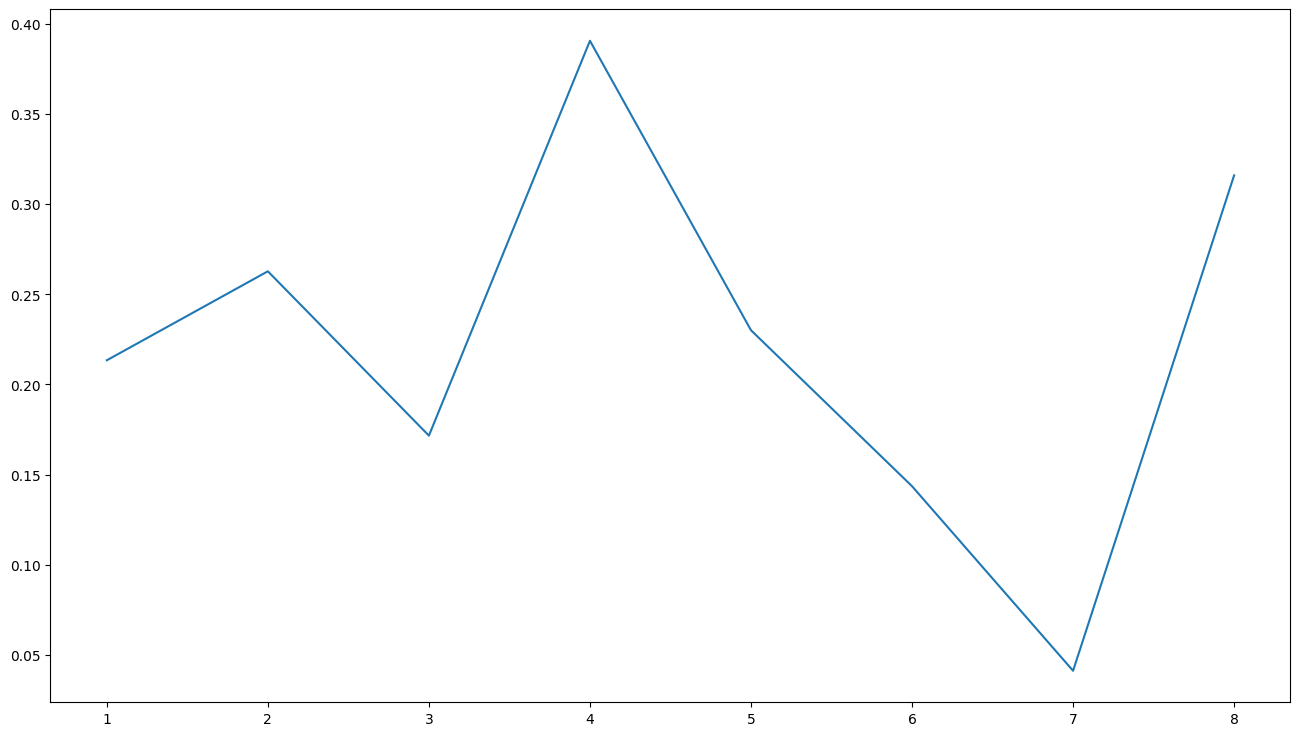

In [9]:
import sklearn.model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold


reg = sk.linear_model.LinearRegression()
kfold = KFold(n_splits=8, shuffle=True, random_state=239)
cv_scores = cross_val_score(reg, df, sc, cv=kfold)

plt.figure(figsize=(16, 9))
plt.plot(range(1, len(cv_scores)+1,), cv_scores)








